In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Load the dataset
data_url = 'https://raw.githubusercontent.com/huy164/datasets/master/walmart_stock_price.csv'
df = pd.read_csv(data_url)

df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the dataset
train_size = int(len(df) * 0.7)
test_size = int(len(df) * 0.2)
validate_size = len(df) - train_size - test_size

train_data = df[:train_size]['Close']
test_data = df[train_size:train_size+test_size]['Close']
validate_data = df[train_size+test_size:]['Close']


In [2]:
df

,Close
0,0.064453
1,0.064209
2,0.063477
3,0.063477
4,0.062500
...,...
12486,136.160004
12487,139.289993
12488,142.820007
12489,141.669998


In [3]:
train_data

0        0.064453
1        0.064209
2        0.063477
3        0.063477
4        0.062500
          ...    
8738    47.410000
8739    48.070000
8740    48.169998
8741    47.970001
8742    48.340000
Name: Close, Length: 8743, dtype: float64

In [4]:
test_data

8743     49.759998
8744     48.930000
8745     48.689999
8746     48.810001
8747     48.700001
           ...    
11236    70.580002
11237    70.440002
11238    69.889999
11239    69.980003
11240    69.900002
Name: Close, Length: 2498, dtype: float64

In [5]:
validate_data

11241     70.250000
11242     69.860001
11243     69.610001
11244     69.660004
11245     70.320000
            ...    
12486    136.160004
12487    139.289993
12488    142.820007
12489    141.669998
12490    141.669998
Name: Close, Length: 1250, dtype: float64

In [6]:
# Build the Holt-Winters model
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=7)
model_fit = model.fit()

# Predict for the test and validate sets
test_predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])
validate_predictions = model_fit.predict(start=validate_data.index[0], end=validate_data.index[-1])

# Calculate RMSE for test and validate sets
test_rmse = np.sqrt(mean_squared_error(test_data, test_predictions))
validate_rmse = np.sqrt(mean_squared_error(validate_data, validate_predictions))

print("Test RMSE:", test_rmse)
print("Validate RMSE:", validate_rmse)

Test RMSE: 11.425212058764453
Validate RMSE: 52.25968172090737


In [7]:
test_predictions

8743     48.365254
8744     48.341542
8745     48.340950
8746     48.336712
8747     48.350147
           ...    
11236    62.106975
11237    62.106384
11238    62.102146
11239    62.115580
11240    62.138150
Length: 2498, dtype: float64

In [8]:
validate_predictions

11241    62.142736
11242    62.169354
11243    62.145642
11244    62.145051
11245    62.140813
           ...    
12486    69.020867
12487    69.025453
12488    69.052071
12489    69.028359
12490    69.027768
Length: 1250, dtype: float64

In [9]:
# Bonus 30 index
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index+1, stop=last_index+32, step=1)

# Predict the closing prices for the next 30 days
y_next_30_days = model_fit.predict(last_index+1, last_index+31)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
12491    69.023529
12492    69.036964
12493    69.059534
12494    69.064120
12495    69.090738
12496    69.067026
12497    69.066435
12498    69.062196
12499    69.075631
12500    69.098201
12501    69.102787
12502    69.129405
12503    69.105693
12504    69.105101
12505    69.100863
12506    69.114298
12507    69.136867
12508    69.141454
12509    69.168072
12510    69.144360
12511    69.143768
12512    69.139530
12513    69.152965
12514    69.175534
12515    69.180121
12516    69.206739
12517    69.183027
12518    69.182435
12519    69.178197
12520    69.191632
12521    69.214201
dtype: float64


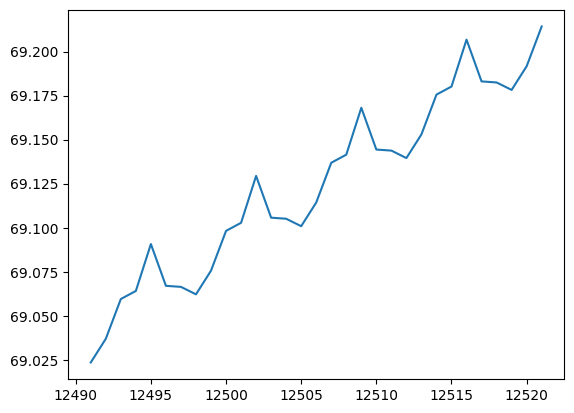

In [10]:
plt.plot(last_data, y_next_30_days)

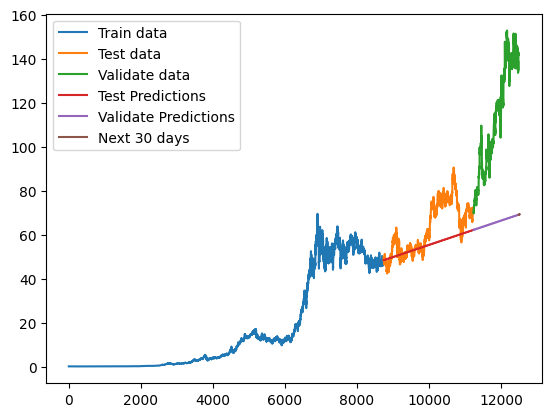

In [11]:
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(validate_data.index, validate_data)
plt.plot(test_data.index, test_predictions)
plt.plot(validate_data.index, validate_predictions)
plt.plot(last_data, y_next_30_days)
plt.legend(['Train data', 'Test data', 'Validate data', 'Test Predictions','Validate Predictions','Next 30 days'])
plt.show()